In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from datetime import datetime
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_json('ultimate_data_challenge.json')

In [3]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [5]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [6]:
df.last_trip_date.max()

'2014-07-01'

In [7]:
df[df.last_trip_date >= '2014-06-01'].shape

(18804, 12)

In [8]:
fraction_retained = df[df.last_trip_date >= '2014-06-01'].shape[0]/df.shape[0]
fraction_retained

0.37608

In [9]:
df['retained'] = [True if i >= '2014-06-01' else False for i in df.last_trip_date]

In [10]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


In [11]:
df.corr()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
trips_in_first_30_days,1.000000,-0.011302,-0.001841,0.005720,0.112210,0.050388,-0.136329,-0.039115,0.210463
avg_rating_of_driver,-0.011302,1.000000,-0.026189,-0.003899,-0.002086,0.014630,0.034509,0.123175,-0.011653
avg_surge,-0.001841,-0.026189,1.000000,0.793582,-0.078791,-0.110071,-0.081491,0.010597,-0.003333
surge_pct,0.005720,-0.003899,0.793582,1.000000,-0.106861,-0.144918,-0.104414,0.020103,0.011797
ultimate_black_user,0.112210,-0.002086,-0.078791,-0.106861,1.000000,0.035998,0.032310,0.009343,0.205002
weekday_pct,0.050388,0.014630,-0.110071,-0.144918,0.035998,1.000000,0.101652,0.020442,0.009693
avg_dist,-0.136329,0.034509,-0.081491,-0.104414,0.032310,0.101652,1.000000,0.080540,-0.092780
avg_rating_by_driver,-0.039115,0.123175,0.010597,0.020103,0.009343,0.020442,0.080540,1.000000,-0.026791
retained,0.210463,-0.011653,-0.003333,0.011797,0.205002,0.009693,-0.092780,-0.026791,1.000000


In [12]:
print(df['city'].unique())
print(df['phone'].unique())

["King's Landing" 'Astapor' 'Winterfell']
['iPhone' 'Android' None]


<AxesSubplot:>

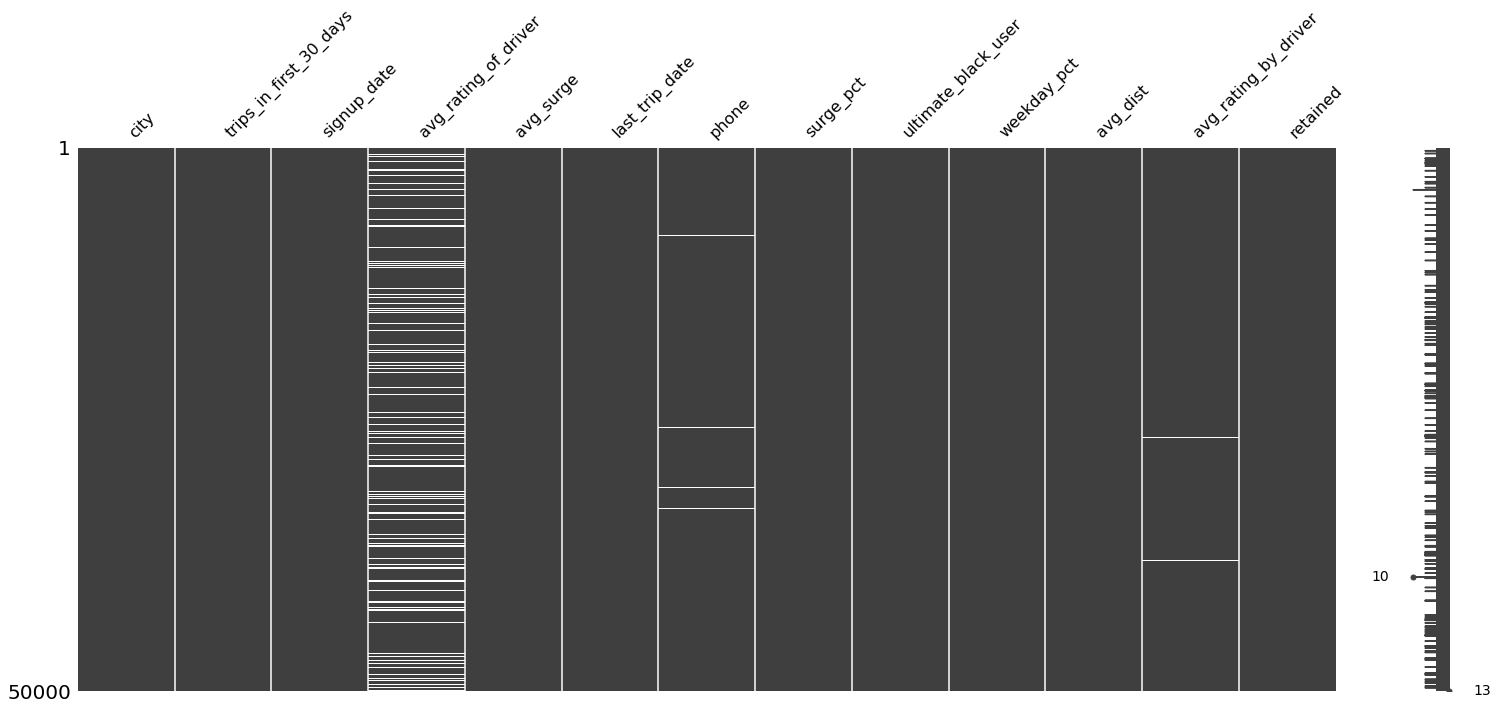

In [13]:
msno.matrix(df)

<AxesSubplot:>

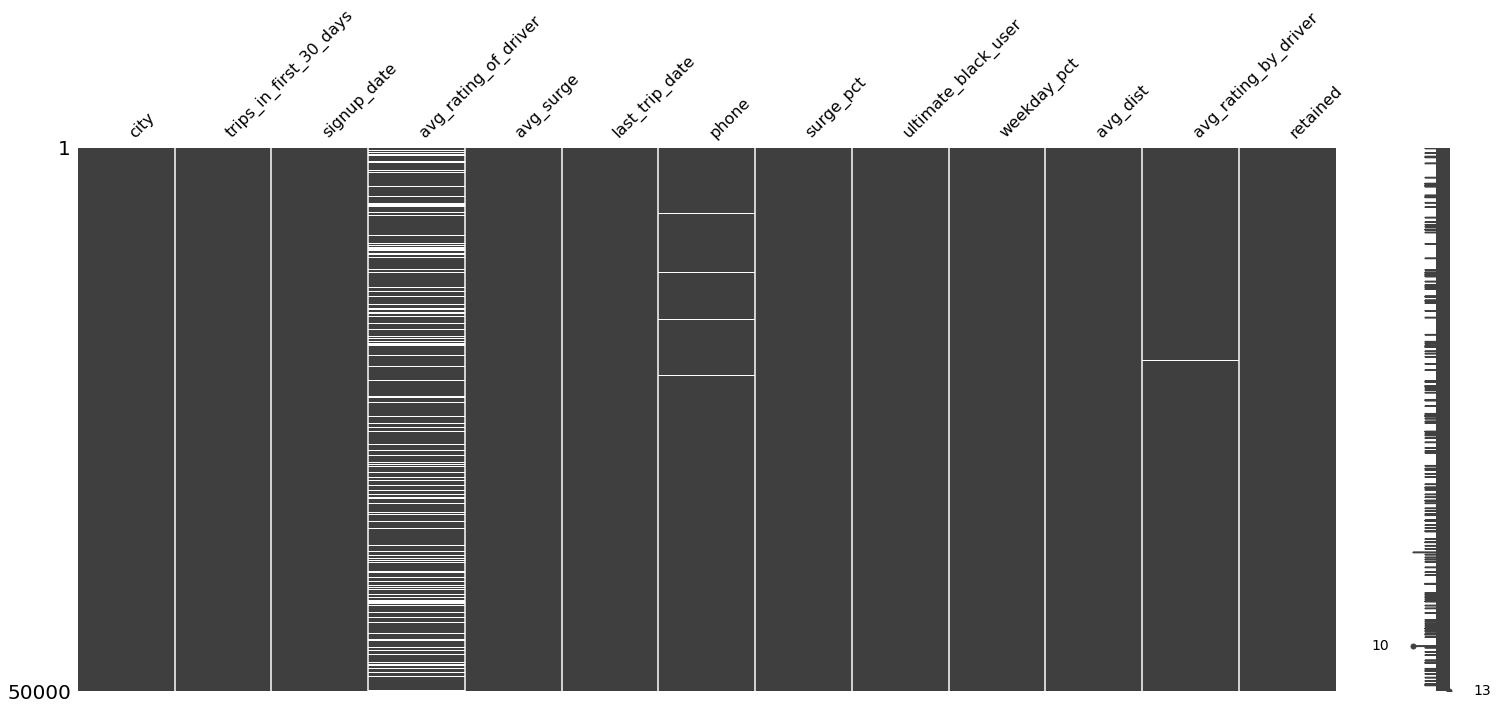

In [14]:
msno.matrix(df.sort_values('signup_date'))

<AxesSubplot:>

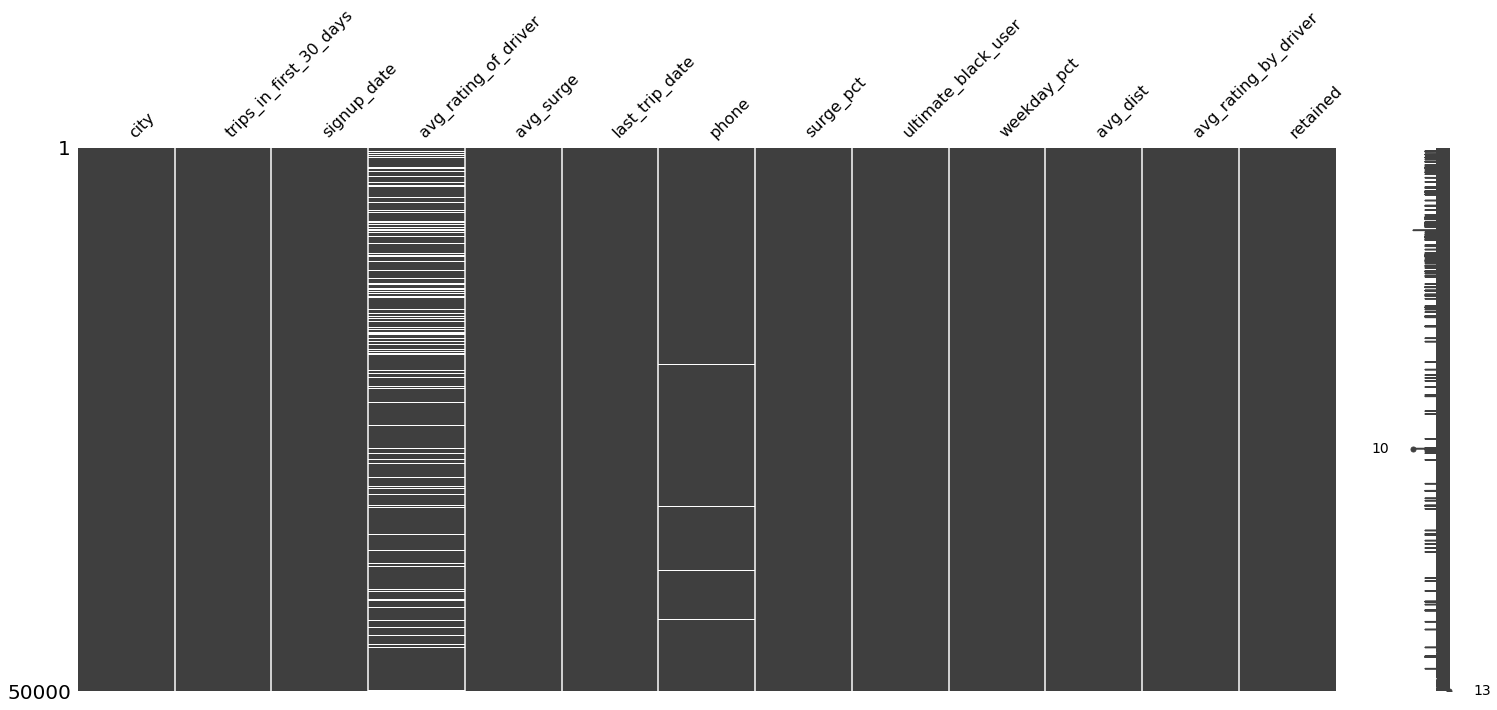

In [15]:
msno.matrix(df.sort_values('last_trip_date'))

In [16]:
df_new = df.dropna(subset=['phone','avg_rating_by_driver'])
df_new.reset_index(drop = True, inplace=True)
df_new.shape

(49406, 13)

In [17]:
df_new['last_trip_date'].max()

'2014-07-01'

In [18]:
df_new['days_since_last_trip'] = df_new["last_trip_date"].apply(lambda 
                        i:(datetime.strptime('2014-07-01','%Y-%m-%d')-datetime.strptime(i,'%Y-%m-%d')).days)

In [19]:
df_new.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,days_since_last_trip
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True,14
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False,57
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False,175
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True,2
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False,108


In [20]:
df_new.corr()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,days_since_last_trip
trips_in_first_30_days,1.000000,-0.011849,-0.001118,0.006362,0.111717,0.050558,-0.138010,-0.038964,0.210294,-0.167318
avg_rating_of_driver,-0.011849,1.000000,-0.022209,-0.001696,-0.003292,0.012975,0.034877,0.122413,-0.011829,0.016265
avg_surge,-0.001118,-0.022209,1.000000,0.793140,-0.077239,-0.109939,-0.081848,0.010811,-0.003434,0.018259
surge_pct,0.006362,-0.001696,0.793140,1.000000,-0.105450,-0.144785,-0.104622,0.020469,0.011697,-0.003765
ultimate_black_user,0.111717,-0.003292,-0.077239,-0.105450,1.000000,0.035799,0.033951,0.009292,0.206077,-0.167389
weekday_pct,0.050558,0.012975,-0.109939,-0.144785,0.035799,1.000000,0.102069,0.020128,0.009519,-0.021810
avg_dist,-0.138010,0.034877,-0.081848,-0.104622,0.033951,0.102069,1.000000,0.080251,-0.093581,0.109100
avg_rating_by_driver,-0.038964,0.122413,0.010811,0.020469,0.009292,0.020128,0.080251,1.000000,-0.026371,0.032296
retained,0.210294,-0.011829,-0.003434,0.011697,0.206077,0.009519,-0.093581,-0.026371,1.000000,-0.780319
days_since_last_trip,-0.167318,0.016265,0.018259,-0.003765,-0.167389,-0.021810,0.109100,0.032296,-0.780319,1.000000


In [21]:
df_pred = df_new.drop(['signup_date','last_trip_date','days_since_last_trip'], axis=1)
df_pred = pd.get_dummies(df_pred, columns=['city', 'phone'], drop_first = True)

In [22]:
df_pred_1 = df_pred.drop('avg_rating_of_driver', axis = 1)
df_pred_2 = df_pred.dropna().reset_index(drop=True)

In [23]:
df_pred_1.head()

,trips_in_first_30_days,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_King's Landing,city_Winterfell,phone_iPhone
0,4,1.10,15.4,True,46.2,3.67,5.0,True,1,0,1
1,0,1.00,0.0,False,50.0,8.26,5.0,False,0,0,0
2,3,1.00,0.0,False,100.0,0.77,5.0,False,0,0,1
3,9,1.14,20.0,True,80.0,2.36,4.9,True,1,0,1
4,14,1.19,11.8,False,82.4,3.13,4.9,False,0,1,0


In [24]:
df_pred_2.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_King's Landing,city_Winterfell,phone_iPhone
0,4,4.7,1.10,15.4,True,46.2,3.67,5.0,True,1,0,1
1,0,5.0,1.00,0.0,False,50.0,8.26,5.0,False,0,0,0
2,3,4.3,1.00,0.0,False,100.0,0.77,5.0,False,0,0,1
3,9,4.6,1.14,20.0,True,80.0,2.36,4.9,True,1,0,1
4,14,4.4,1.19,11.8,False,82.4,3.13,4.9,False,0,1,0


In [25]:
X_1 = df_pred_1.drop('retained', axis=1)
y_1 = df_pred_1['retained']
X_2 = df_pred_2.drop('retained', axis=1)
y_2 = df_pred_2['retained']

In [26]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.25, random_state = 42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.25, random_state = 42)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler_1 = StandardScaler()
scaler_2 = StandardScaler()
scaler_1.fit(X_train_1[['trips_in_first_30_days', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 
                        'avg_rating_by_driver']])
scaler_2.fit(X_train_2[['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 
                   'avg_dist', 'avg_rating_by_driver']])

StandardScaler()

In [28]:
scaled_train_columns_1 = scaler_1.transform(X_train_1[['trips_in_first_30_days', 'avg_surge', 
                                                 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']])
scaled_test_columns_1 = scaler_1.transform(X_test_1[['trips_in_first_30_days', 'avg_surge', 
                                                'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']])
scaled_train_columns_2 = scaler_2.transform(X_train_2[['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 
                                                 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']])
scaled_test_columns_2 = scaler_2.transform(X_test_2[['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 
                                                'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']])

In [29]:
X_train_1 = pd.concat([X_train_1.drop(columns=['trips_in_first_30_days', 'avg_surge',
                    'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']).\
                     reset_index(drop=True), pd.DataFrame(scaled_train_columns_1, \
                   columns=['trips_in_first_30_days', 'avg_surge',\
                    'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver'])], axis=1)
X_train_2 = pd.concat([X_train_2.drop(columns=['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
                    'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']).\
                     reset_index(drop=True), pd.DataFrame(scaled_train_columns_2, \
                   columns=['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',\
                    'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver'])], axis=1)

In [30]:
X_test_1 = pd.concat([X_test_1.drop(columns=['trips_in_first_30_days', 'avg_surge',
                    'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']).\
                     reset_index(drop=True), pd.DataFrame(scaled_test_columns_1, \
                   columns=['trips_in_first_30_days', 'avg_surge',\
                    'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver'])], axis=1)
X_test_2 = pd.concat([X_test_2.drop(columns=['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
                    'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']).\
                     reset_index(drop=True), pd.DataFrame(scaled_test_columns_2, \
                   columns=['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',\
                    'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver'])], axis=1)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score

In [32]:
lr_1 = LogisticRegression(random_state = 42)
lr_mean_accuracy_1 = np.mean(cross_val_score(lr_1,X_train_1,y_train_1,cv=5))
lr_1.fit(X_train_1, y_train_1)
target_names = ['Unreatiend User', 'Retained User']
lr_cr_train_1 = classification_report(y_train_1, lr_1.predict(X_train_1), target_names=target_names)
lr_cr_test_1 = classification_report(y_test_1, lr_1.predict(X_test_1), target_names=target_names)
lr_accuracy_train_1 = lr_1.score(X_train_1, y_train_1)
lr_accuracy_test_1 = lr_1.score(X_test_1, y_test_1)
lr_roc_auc_score_train_1 = roc_auc_score(y_train_1, lr_1.predict_proba(X_train_1)[:, 1])
lr_roc_auc_score_test_1 = roc_auc_score(y_test_1, lr_1.predict_proba(X_test_1)[:, 1])

Mean cross validation accuracy for training set: 0.7183300164197691
Accuracy for training set: 0.7181410913801479
Accuracy for test set: 0.7155926165803109
roc-auc score for training set: 0.7614911810220235
roc-auc score for test set: 0.7585960232080637
Classification report for training set:
                  precision    recall  f1-score   support

Unreatiend User       0.74      0.85      0.79     23087
  Retained User       0.67      0.50      0.57     13967

       accuracy                           0.72     37054
      macro avg       0.70      0.67      0.68     37054
   weighted avg       0.71      0.72      0.71     37054

Classification report for test set:
                  precision    recall  f1-score   support

Unreatiend User       0.73      0.85      0.79      7684
  Retained User       0.67      0.49      0.57      4668

       accuracy                           0.72     12352
      macro avg       0.70      0.67      0.68     12352
   weighted avg       0.71      0.72

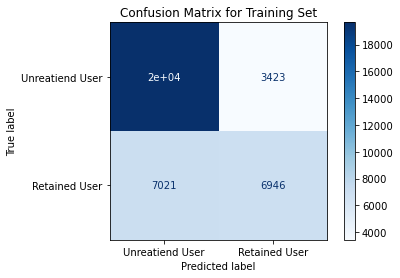

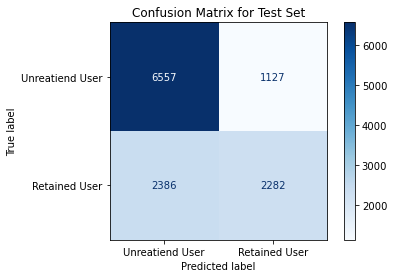

In [33]:
print('Mean cross validation accuracy for training set:', lr_mean_accuracy_1)
print('Accuracy for training set:', lr_accuracy_train_1)
print('Accuracy for test set:', lr_accuracy_test_1)
print('roc-auc score for training set:', lr_roc_auc_score_train_1)
print('roc-auc score for test set:', lr_roc_auc_score_test_1)
print('Classification report for training set:\n', lr_cr_train_1)
print('Classification report for test set:\n', lr_cr_test_1)
disp = plot_confusion_matrix(lr_1, X_train_1, y_train_1, display_labels=target_names, cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix for Training Set')
plt.show()
disp = plot_confusion_matrix(lr_1, X_test_1, y_test_1, display_labels=target_names, cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix for Test Set')
plt.show()

In [34]:
lr_2 = LogisticRegression(random_state = 42)
lr_mean_accuracy_2 = np.mean(cross_val_score(lr_2,X_train_2,y_train_2,cv=5))
lr_2.fit(X_train_2, y_train_2)
target_names = ['Unreatiend User', 'Retained User']
lr_cr_train_2 = classification_report(y_train_2, lr_2.predict(X_train_2), target_names=target_names)
lr_cr_test_2 = classification_report(y_test_2, lr_2.predict(X_test_2), target_names=target_names)
lr_accuracy_train_2 = lr_2.score(X_train_2, y_train_2)
lr_accuracy_test_2 = lr_2.score(X_test_2, y_test_2)
lr_roc_auc_score_train_2 = roc_auc_score(y_train_2, lr_2.predict_proba(X_train_2)[:, 1])
lr_roc_auc_score_test_2 = roc_auc_score(y_test_2, lr_2.predict_proba(X_test_2)[:, 1])

Mean cross validation accuracy for training set: 0.7039541960444324
Accuracy for training set: 0.7036965543866422
Accuracy for test set: 0.7090330052113492
roc-auc score for training set: 0.7591712886578904
roc-auc score for test set: 0.7588420500228801
Classification report for training set:
                  precision    recall  f1-score   support

Unreatiend User       0.72      0.82      0.77     18338
  Retained User       0.67      0.54      0.60     12745

       accuracy                           0.70     31083
      macro avg       0.70      0.68      0.68     31083
   weighted avg       0.70      0.70      0.70     31083

Classification report for test set:
                  precision    recall  f1-score   support

Unreatiend User       0.72      0.82      0.77      6072
  Retained User       0.69      0.55      0.61      4290

       accuracy                           0.71     10362
      macro avg       0.70      0.69      0.69     10362
   weighted avg       0.71      0.71

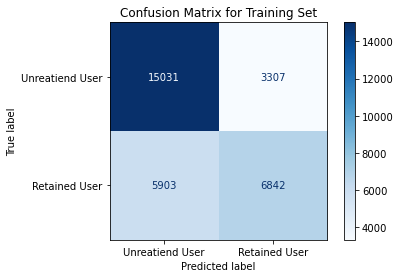

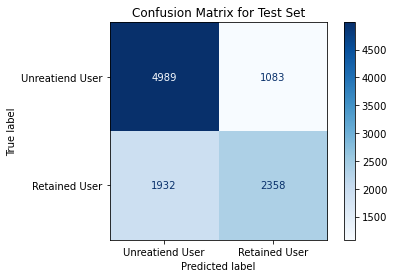

In [35]:
print('Mean cross validation accuracy for training set:', lr_mean_accuracy_2)
print('Accuracy for training set:', lr_accuracy_train_2)
print('Accuracy for test set:', lr_accuracy_test_2)
print('roc-auc score for training set:', lr_roc_auc_score_train_2)
print('roc-auc score for test set:', lr_roc_auc_score_test_2)
print('Classification report for training set:\n', lr_cr_train_2)
print('Classification report for test set:\n', lr_cr_test_2)
disp = plot_confusion_matrix(lr_2, X_train_2, y_train_2, display_labels=target_names, cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix for Training Set')
plt.show()
disp = plot_confusion_matrix(lr_2, X_test_2, y_test_2, display_labels=target_names, cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix for Test Set')
plt.show()

In [36]:
rf_1 = RandomForestClassifier(random_state = 42, max_depth=3, max_leaf_nodes=5)
rf_mean_accuracy_1 = np.mean(cross_val_score(rf_1,X_train_1,y_train_1,cv=5))
rf_1.fit(X_train_1, y_train_1)
rf_cr_train_1 = classification_report(y_train_1, rf_1.predict(X_train_1), target_names=target_names)
rf_cr_test_1 = classification_report(y_test_1, rf_1.predict(X_test_1), target_names=target_names)
rf_accuracy_train_1 = rf_1.score(X_train_1, y_train_1)
rf_accuracy_test_1 = rf_1.score(X_test_1, y_test_1)
rf_roc_auc_score_train_1 = roc_auc_score(y_train_1, rf_1.predict_proba(X_train_1)[:, 1])
rf_roc_auc_score_test_1 = roc_auc_score(y_test_1, rf_1.predict_proba(X_test_1)[:, 1])

Mean cross validation accuracy for training set: 0.7319045857900618
Accuracy for training set: 0.7316079235710045
Accuracy for test set: 0.7331606217616581
roc-auc score for training set: 0.8035596433026707
roc-auc score for test set: 0.8052776454440548
Classification report for training set:
                  precision    recall  f1-score   support

Unreatiend User       0.73      0.92      0.81     23087
  Retained User       0.76      0.43      0.54     13967

       accuracy                           0.73     37054
      macro avg       0.74      0.67      0.68     37054
   weighted avg       0.74      0.73      0.71     37054

Classification report for test set:
                  precision    recall  f1-score   support

Unreatiend User       0.73      0.91      0.81      7684
  Retained User       0.75      0.44      0.55      4668

       accuracy                           0.73     12352
      macro avg       0.74      0.68      0.68     12352
   weighted avg       0.74      0.73

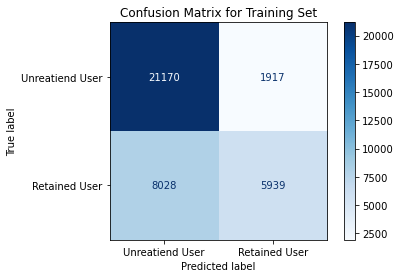

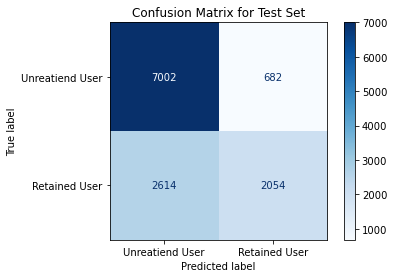

In [37]:
print('Mean cross validation accuracy for training set:', rf_mean_accuracy_1)
print('Accuracy for training set:', rf_accuracy_train_1)
print('Accuracy for test set:', rf_accuracy_test_1)
print('roc-auc score for training set:', rf_roc_auc_score_train_1)
print('roc-auc score for test set:', rf_roc_auc_score_test_1)
print('Classification report for training set:\n', rf_cr_train_1)
print('Classification report for test set:\n', rf_cr_test_1)
disp = plot_confusion_matrix(rf_1, X_train_1, y_train_1, display_labels=target_names, cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix for Training Set')
plt.show()
disp = plot_confusion_matrix(rf_1, X_test_1, y_test_1, display_labels=target_names, cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix for Test Set')
plt.show()

In [38]:
rf_2 = RandomForestClassifier(random_state = 42, max_depth=3, max_leaf_nodes=5)
rf_mean_accuracy_2 = np.mean(cross_val_score(rf_2,X_train_2,y_train_2,cv=5))
rf_2.fit(X_train_2, y_train_2)
rf_cr_train_2 = classification_report(y_train_2, rf_2.predict(X_train_2), target_names=target_names)
rf_cr_test_2 = classification_report(y_test_2, rf_2.predict(X_test_2), target_names=target_names)
rf_accuracy_train_2 = rf_2.score(X_train_2, y_train_2)
rf_accuracy_test_2 = rf_2.score(X_test_2, y_test_2)
rf_roc_auc_score_train_2 = roc_auc_score(y_train_2, rf_2.predict_proba(X_train_2)[:, 1])
rf_roc_auc_score_test_2 = roc_auc_score(y_test_2, rf_2.predict_proba(X_test_2)[:, 1])

Mean cross validation accuracy for training set: 0.7183025059573234
Accuracy for training set: 0.7170479039989704
Accuracy for test set: 0.7118316927234125
roc-auc score for training set: 0.8036482179085969
roc-auc score for test set: 0.7995121863204868
Classification report for training set:
                  precision    recall  f1-score   support

Unreatiend User       0.71      0.89      0.79     18338
  Retained User       0.75      0.47      0.57     12745

       accuracy                           0.72     31083
      macro avg       0.73      0.68      0.68     31083
   weighted avg       0.72      0.72      0.70     31083

Classification report for test set:
                  precision    recall  f1-score   support

Unreatiend User       0.70      0.89      0.78      6072
  Retained User       0.75      0.46      0.57      4290

       accuracy                           0.71     10362
      macro avg       0.72      0.67      0.68     10362
   weighted avg       0.72      0.71

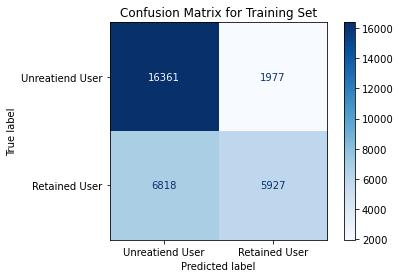

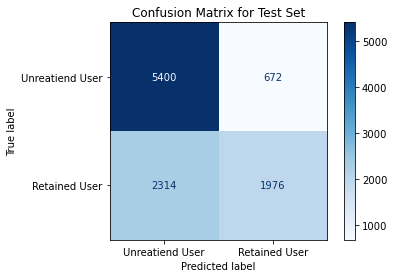

In [39]:
print('Mean cross validation accuracy for training set:', rf_mean_accuracy_2)
print('Accuracy for training set:', rf_accuracy_train_2)
print('Accuracy for test set:', rf_accuracy_test_2)
print('roc-auc score for training set:', rf_roc_auc_score_train_2)
print('roc-auc score for test set:', rf_roc_auc_score_test_2)
print('Classification report for training set:\n', rf_cr_train_2)
print('Classification report for test set:\n', rf_cr_test_2)
disp = plot_confusion_matrix(rf_2, X_train_2, y_train_2, display_labels=target_names, cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix for Training Set')
plt.show()
disp = plot_confusion_matrix(rf_2, X_test_2, y_test_2, display_labels=target_names, cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix for Test Set')
plt.show()

In [40]:
gb_1 = GradientBoostingClassifier(random_state = 42, max_leaf_nodes=5)
gb_mean_accuracy_1 = np.mean(cross_val_score(gb_1,X_train_1,y_train_1,cv=5))
gb_1.fit(X_train_1, y_train_1)
gb_cr_train_1 = classification_report(y_train_1, gb_1.predict(X_train_1), target_names=target_names)
gb_cr_test_1 = classification_report(y_test_1, gb_1.predict(X_test_1), target_names=target_names)
gb_accuracy_train_1 = gb_1.score(X_train_1, y_train_1)
gb_accuracy_test_1 = gb_1.score(X_test_1, y_test_1)
gb_roc_auc_score_train_1 = roc_auc_score(y_train_1, gb_1.predict_proba(X_train_1)[:, 1])
gb_roc_auc_score_test_1 = roc_auc_score(y_test_1, gb_1.predict_proba(X_test_1)[:, 1])

Mean cross validation accuracy for training set: 0.7821826584147175
Accuracy for training set: 0.7839369568737519
Accuracy for test set: 0.7870790155440415
roc-auc score for training set: 0.8495245224506185
roc-auc score for test set: 0.8526134692906213
Classification report for training set:
                  precision    recall  f1-score   support

Unreatiend User       0.80      0.86      0.83     23087
  Retained User       0.74      0.65      0.70     13967

       accuracy                           0.78     37054
      macro avg       0.77      0.76      0.76     37054
   weighted avg       0.78      0.78      0.78     37054

Classification report for test set:
                  precision    recall  f1-score   support

Unreatiend User       0.81      0.86      0.83      7684
  Retained User       0.74      0.67      0.70      4668

       accuracy                           0.79     12352
      macro avg       0.78      0.76      0.77     12352
   weighted avg       0.78      0.79

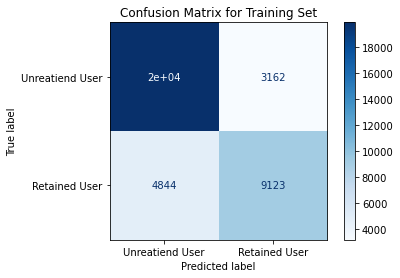

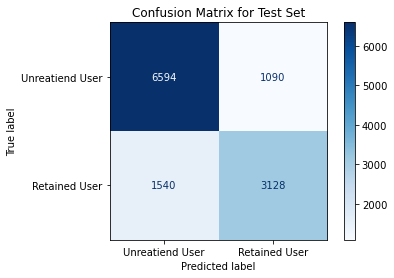

In [41]:
print('Mean cross validation accuracy for training set:', gb_mean_accuracy_1)
print('Accuracy for training set:', gb_accuracy_train_1)
print('Accuracy for test set:', gb_accuracy_test_1)
print('roc-auc score for training set:', gb_roc_auc_score_train_1)
print('roc-auc score for test set:', gb_roc_auc_score_test_1)
print('Classification report for training set:\n', gb_cr_train_1)
print('Classification report for test set:\n', gb_cr_test_1)
disp = plot_confusion_matrix(gb_1, X_train_1, y_train_1, display_labels=target_names, cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix for Training Set')
plt.show()
disp = plot_confusion_matrix(gb_1, X_test_1, y_test_1, display_labels=target_names, cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix for Test Set')
plt.show()

In [42]:
gb_2 = GradientBoostingClassifier(random_state = 42, max_leaf_nodes=5)
gb_mean_accuracy_2 = np.mean(cross_val_score(gb_2,X_train_2,y_train_2,cv=5))
gb_2.fit(X_train_2, y_train_2)
gb_cr_train_2 = classification_report(y_train_2, gb_2.predict(X_train_2), target_names=target_names)
gb_cr_test_2 = classification_report(y_test_2, gb_2.predict(X_test_2), target_names=target_names)
gb_accuracy_train_2 = gb_2.score(X_train_2, y_train_2)
gb_accuracy_test_2 = gb_2.score(X_test_2, y_test_2)
gb_roc_auc_score_train_2 = roc_auc_score(y_train_2, gb_2.predict_proba(X_train_2)[:, 1])
gb_roc_auc_score_test_2 = roc_auc_score(y_test_2, gb_2.predict_proba(X_test_2)[:, 1])

Mean cross validation accuracy for training set: 0.7776278311906428
Accuracy for training set: 0.7794292700189814
Accuracy for test set: 0.7752364408415364
roc-auc score for training set: 0.8522429570087107
roc-auc score for test set: 0.8481313975879193
Classification report for training set:
                  precision    recall  f1-score   support

Unreatiend User       0.80      0.84      0.82     18338
  Retained User       0.75      0.70      0.72     12745

       accuracy                           0.78     31083
      macro avg       0.77      0.77      0.77     31083
   weighted avg       0.78      0.78      0.78     31083

Classification report for test set:
                  precision    recall  f1-score   support

Unreatiend User       0.79      0.83      0.81      6072
  Retained User       0.75      0.69      0.72      4290

       accuracy                           0.78     10362
      macro avg       0.77      0.76      0.77     10362
   weighted avg       0.77      0.78

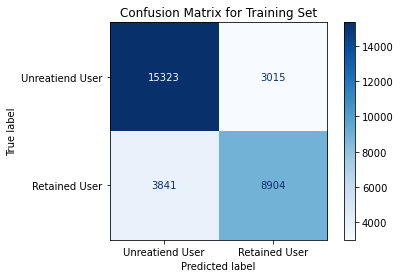

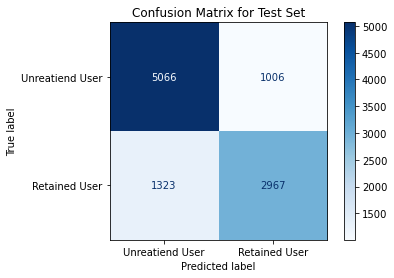

In [43]:
print('Mean cross validation accuracy for training set:', gb_mean_accuracy_2)
print('Accuracy for training set:', gb_accuracy_train_2)
print('Accuracy for test set:', gb_accuracy_test_2)
print('roc-auc score for training set:', gb_roc_auc_score_train_2)
print('roc-auc score for test set:', gb_roc_auc_score_test_2)
print('Classification report for training set:\n', gb_cr_train_2)
print('Classification report for test set:\n', gb_cr_test_2)
disp = plot_confusion_matrix(gb_2, X_train_2, y_train_2, display_labels=target_names, cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix for Training Set')
plt.show()
disp = plot_confusion_matrix(gb_2, X_test_2, y_test_2, display_labels=target_names, cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix for Test Set')
plt.show()

In [44]:
sv_1 = SVC(random_state = 42, kernel='linear', class_weight='balanced', probability=True)
sv_mean_accuracy_1 = np.mean(cross_val_score(sv_1,X_train_1,y_train_1,cv=5))
sv_1.fit(X_train_1, y_train_1)
sv_cr_train_1 = classification_report(y_train_1, sv_1.predict(X_train_1), target_names=target_names)
sv_cr_test_1 = classification_report(y_test_1, sv_1.predict(X_test_1), target_names=target_names)
sv_accuracy_train_1 = sv_1.score(X_train_1, y_train_1)
sv_accuracy_test_1 = sv_1.score(X_test_1, y_test_1)
sv_roc_auc_score_train_1 = roc_auc_score(y_train_1, sv_1.predict_proba(X_train_1)[:, 1])
sv_roc_auc_score_test_1 = roc_auc_score(y_test_1, sv_1.predict_proba(X_test_1)[:, 1])

Mean cross validation accuracy for training set: 0.7061856113145448
Accuracy for training set: 0.7057807524153937
Accuracy for test set: 0.7019915803108808
roc-auc score for training set: 0.7600462170157727
roc-auc score for test set: 0.7564831768524231
Classification report for training set:
                  precision    recall  f1-score   support

Unreatiend User       0.78      0.74      0.76     23087
  Retained User       0.60      0.65      0.62     13967

       accuracy                           0.71     37054
      macro avg       0.69      0.69      0.69     37054
   weighted avg       0.71      0.71      0.71     37054

Classification report for test set:
                  precision    recall  f1-score   support

Unreatiend User       0.77      0.74      0.75      7684
  Retained User       0.60      0.65      0.62      4668

       accuracy                           0.70     12352
      macro avg       0.69      0.69      0.69     12352
   weighted avg       0.71      0.70

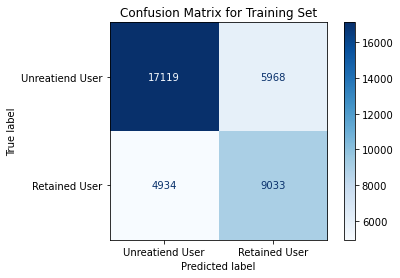

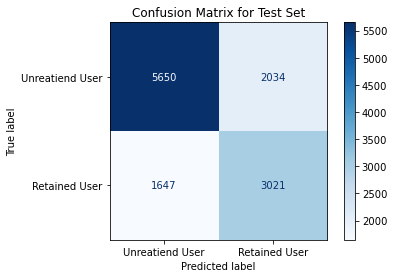

In [45]:
print('Mean cross validation accuracy for training set:', sv_mean_accuracy_1)
print('Accuracy for training set:', sv_accuracy_train_1)
print('Accuracy for test set:', sv_accuracy_test_1)
print('roc-auc score for training set:', sv_roc_auc_score_train_1)
print('roc-auc score for test set:', sv_roc_auc_score_test_1)
print('Classification report for training set:\n', sv_cr_train_1)
print('Classification report for test set:\n', sv_cr_test_1)
disp = plot_confusion_matrix(sv_1, X_train_1, y_train_1, display_labels=target_names, cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix for Training Set')
plt.show()
disp = plot_confusion_matrix(sv_1, X_test_1, y_test_1, display_labels=target_names, cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix for Test Set')
plt.show()

In [46]:
sv_2 = SVC(random_state = 42, kernel='linear', class_weight='balanced', probability=True)
sv_mean_accuracy_2 = np.mean(cross_val_score(sv_2,X_train_2,y_train_2,cv=5))
sv_2.fit(X_train_2, y_train_2)
sv_cr_train_2 = classification_report(y_train_2, sv_2.predict(X_train_2), target_names=target_names)
sv_cr_test_2 = classification_report(y_test_2, sv_2.predict(X_test_2), target_names=target_names)
sv_accuracy_train_2 = sv_2.score(X_train_2, y_train_2)
sv_accuracy_test_2 = sv_2.score(X_test_2, y_test_2)
sv_roc_auc_score_train_2 = roc_auc_score(y_train_2, sv_2.predict_proba(X_train_2)[:, 1])
sv_roc_auc_score_test_2 = roc_auc_score(y_test_2, sv_2.predict_proba(X_test_2)[:, 1])

Mean cross validation accuracy for training set: 0.6974233424812482
Accuracy for training set: 0.697712576006177
Accuracy for test set: 0.7028565913916233
roc-auc score for training set: 0.7580860097910382
roc-auc score for test set: 0.7575020691868519
Classification report for training set:
                  precision    recall  f1-score   support

Unreatiend User       0.75      0.72      0.74     18338
  Retained User       0.62      0.66      0.64     12745

       accuracy                           0.70     31083
      macro avg       0.69      0.69      0.69     31083
   weighted avg       0.70      0.70      0.70     31083

Classification report for test set:
                  precision    recall  f1-score   support

Unreatiend User       0.75      0.73      0.74      6072
  Retained User       0.63      0.66      0.65      4290

       accuracy                           0.70     10362
      macro avg       0.69      0.70      0.70     10362
   weighted avg       0.71      0.70 

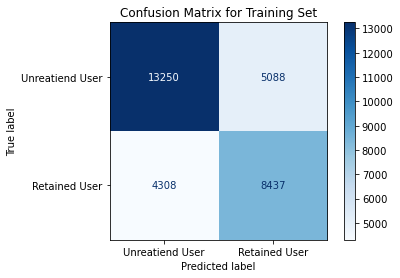

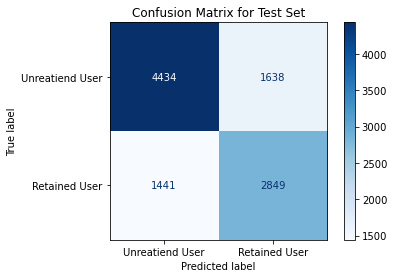

In [47]:
print('Mean cross validation accuracy for training set:', sv_mean_accuracy_2)
print('Accuracy for training set:', sv_accuracy_train_2)
print('Accuracy for test set:', sv_accuracy_test_2)
print('roc-auc score for training set:', sv_roc_auc_score_train_2)
print('roc-auc score for test set:', sv_roc_auc_score_test_2)
print('Classification report for training set:\n', sv_cr_train_2)
print('Classification report for test set:\n', sv_cr_test_2)
disp = plot_confusion_matrix(sv_2, X_train_2, y_train_2, display_labels=target_names, cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix for Training Set')
plt.show()
disp = plot_confusion_matrix(sv_2, X_test_2, y_test_2, display_labels=target_names, cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix for Test Set')
plt.show()

For the sake of brevity, we don't do any hyperparameter tuning.

Text(0.5, 1.0, 'Feature Importance (GB_1)')

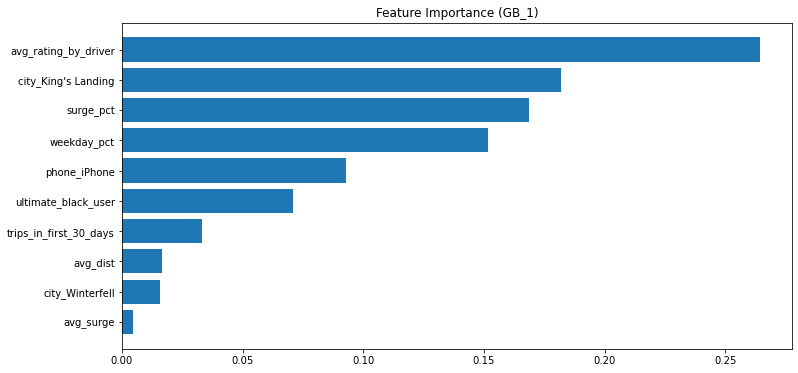

In [48]:
feature_importance = gb_1.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train_1.columns)[sorted_idx])
plt.title("Feature Importance (GB_1)")

Text(0.5, 1.0, 'Feature Importance (GB_2)')

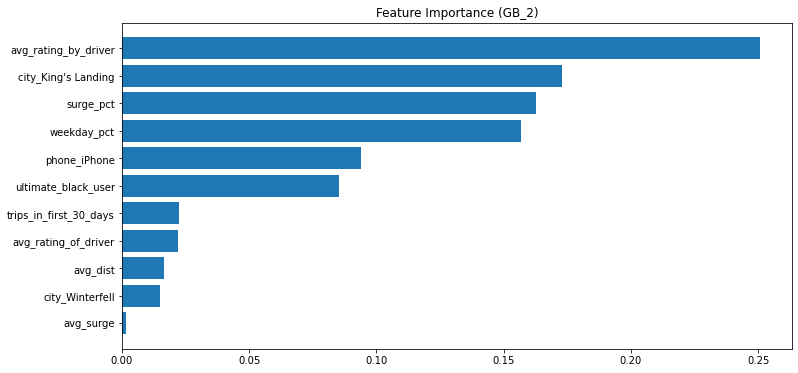

In [49]:
feature_importance = gb_2.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train_2.columns)[sorted_idx])
plt.title("Feature Importance (GB_2)")